In [1]:
# Hotel Booking Data Analysis

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("DS1_C5_S5_Hotel Dataset.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

In [5]:
# Task 1: Data Cleaning

In [6]:
df.drop_duplicates(inplace=True)

# Fill missing numeric values in agent and company with mean
df['agent'].fillna(df['agent'].mean(), inplace=True)
df['company'].fillna(df['company'].mean(), inplace=True)

# Check for remaining missing values
missing_summary = df.isnull().sum()

# Display numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)
print("Missing values summary:\n", missing_summary)


Numerical columns: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Categorical columns: Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')
Missing values summary:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_w

### Interpretations:

1. The dataset includes booking records for two hotels: Resort Hotel and City Hotel over multiple years.
2. It contains important details like cancellation status, lead time before arrival, arrival dates, length of stay, and number of guests.
3. The dataset has some missing values especially in 'agent' and 'company' columns, which need cleaning or removal for analysis.
4. Initial data checks help identify issues like wrong data types or outliers before deeper analysis.


In [7]:
# Task 2: Booking Pattern Analysis

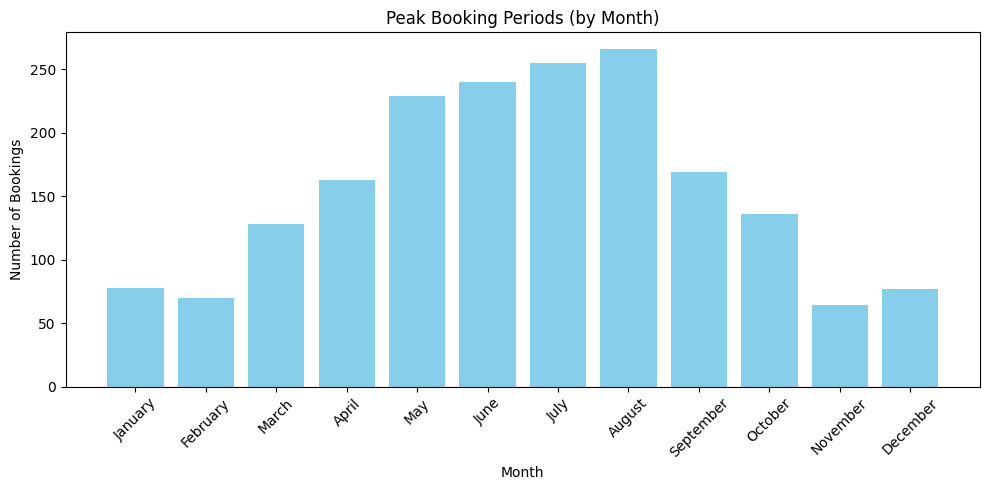

In [8]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# I. Peak booking periods by month
bookings_by_month = df['arrival_date_month'].value_counts().reindex(month_order, fill_value=0)
plt.figure(figsize=(10, 5))
bars = plt.bar(bookings_by_month.index, bookings_by_month.values, color='skyblue')
plt.title('Peak Booking Periods (by Month)')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Interpretations:
Based on the bar chart the peak booking periods for the hotel are from **June to August**. Bookings are highest in **August**, with a total of over 250 bookings. Conversely, the low season for bookings occurs in February, November, and December.

In [9]:
# II. Relationship between lead time and cancellation
lead_corr = df['lead_time'].corr(df['is_canceled']).round(2)
print(f"Correlation between Lead Time and Cancellation: {lead_corr}")

Correlation between Lead Time and Cancellation: 0.17


## Interpretations:
A positive correlation of 0.17 between lead time and cancellation indicates a weak positive relationship. This means that as the lead time (the number of days between the booking date and the arrival date) increases, the likelihood of a booking being canceled also slightly increases.

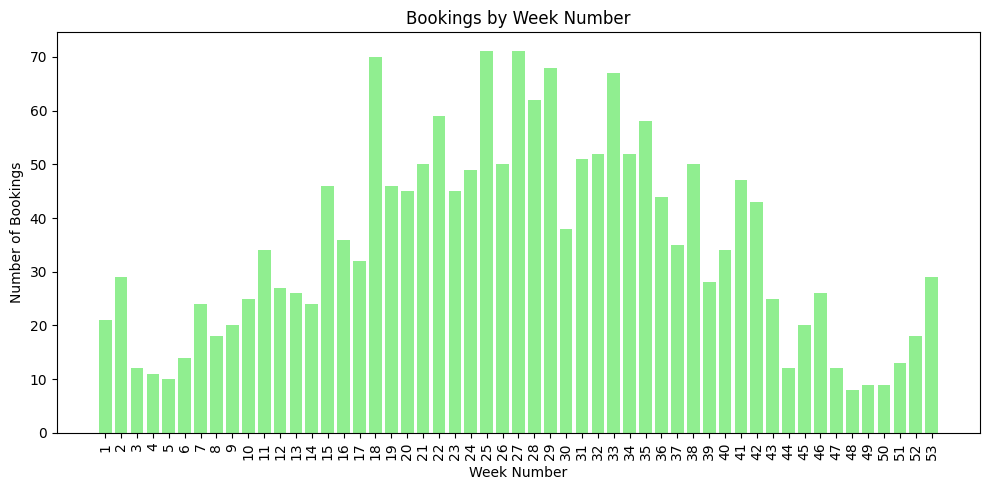

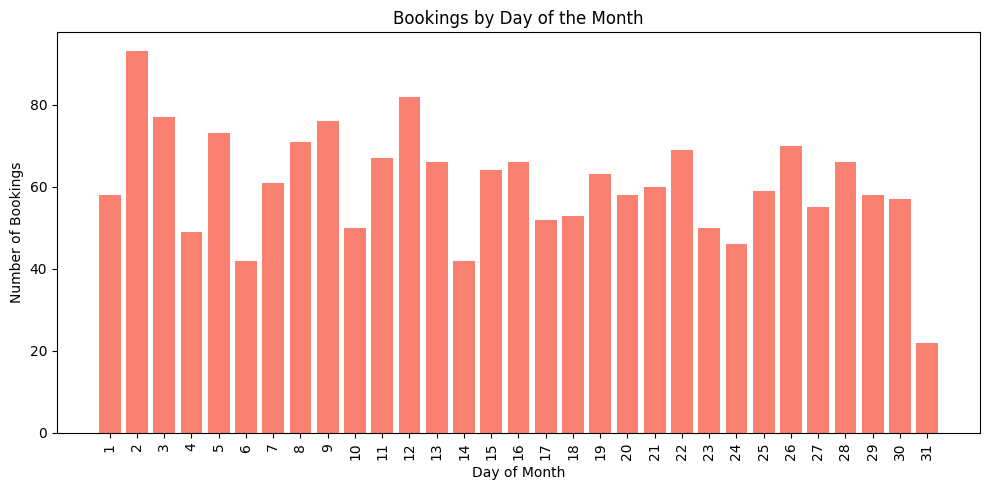

In [10]:
# III. Booking patterns by week number
bookings_by_week = df['arrival_date_week_number'].value_counts().sort_index()

# Bar plot for bookings by week number
plt.figure(figsize=(10, 5))
bars = plt.bar(bookings_by_week.index, bookings_by_week.values, color='lightgreen')
plt.title('Bookings by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.xticks(bookings_by_week.index, rotation=90)
plt.tight_layout()
plt.show()

# Booking patterns by day of the month
bookings_by_day = df['arrival_date_day_of_month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
bars = plt.bar(bookings_by_day.index, bookings_by_day.values, color='salmon')
plt.title('Bookings by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Bookings')
plt.xticks(bookings_by_day.index, rotation=90)
plt.tight_layout()
plt.show()

## Interpretations:

### Bookings by Week
* **Peak Season:** People book the most trips during the summer, from late May to late August **(weeks 20-35)**.
* **Low Season:** Bookings are much lower in the winter, especially in late fall and early spring.

### Bookings by Day of the Month
* **No Strong Pattern:** There isn't a specific "best day" to book. Bookings are fairly consistent throughout the month.
* **End of the Month:** The number of bookings is lowest on the 31st, just because not every month has that day.

In [11]:
# Task 3: Booking Cancellation Analysis

In [12]:
a='''1. Factors Influencing Booking Cancellations
Lead Time
Longer lead times strongly increase cancellation likelihood due to greater uncertainty.

Deposit Type
Financial commitment via deposit type is a key behavioral driver; no deposit → higher cancellations.

Previous Booking Behavior
Guests with past cancellations are more prone to cancel again.

Market Segment & Distribution Channel
OTA bookings often show higher cancellations than direct or corporate bookings.

Customer Type & Loyalty
Repeated or corporate guests typically have lower cancellation rates.

Waiting List & Special Requests
Longer waits and unfulfilled requests increase cancellation risk.

Seasonal & Date Factors
Off-season periods tend to see higher cancellations compared to peak seasons.

Pricing (ADR)
Higher prices can motivate cancellations if alternatives exist.

Room Type & Availability
Dissatisfaction with room assignment can lead to cancellations.

Stay Details
Longer stays and family bookings have a moderately higher cancellation risk.'''

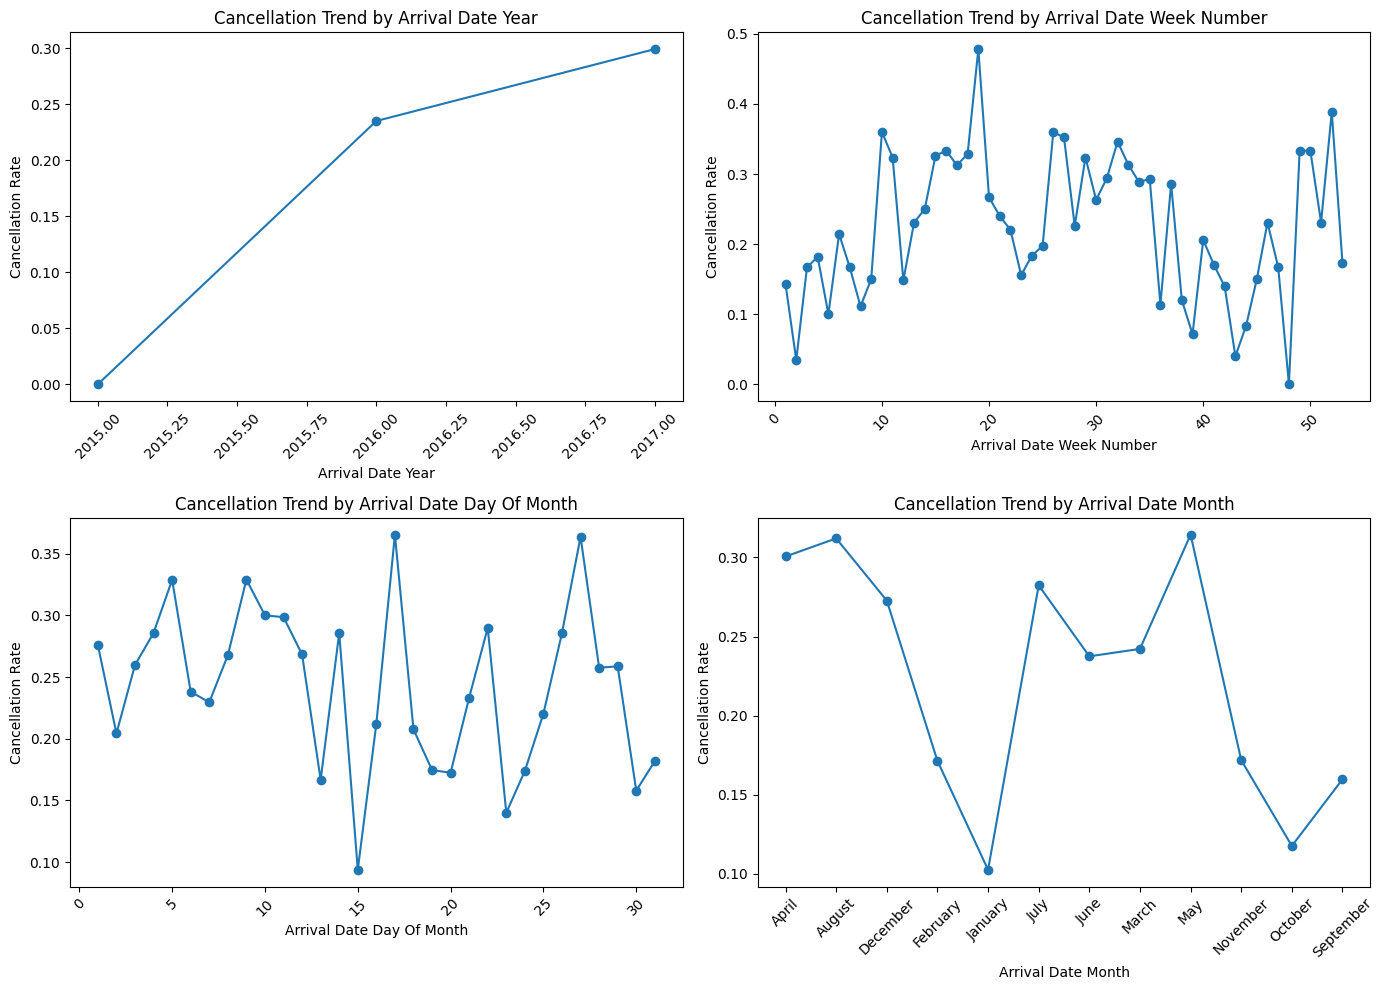

In [13]:
# 2.pecific trends or patterns in cancellations over time
# Define relevant time columns to analyze cancellation trends
time_periods = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_month']



# Plot cancellation rate trends over multiple time granularities
plt.figure(figsize=(14, 10))

for i,col in enumerate (time_periods,1):
    plt.subplot(2,2,i)
    cancel_rate = df.groupby(col)['is_canceled'].mean()
    plt.plot(cancel_rate.index, cancel_rate.values, marker='o', linestyle='-')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Cancellation Rate')
    plt.title(f'Cancellation Trend by {col.replace("_", " ").title()}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Interpretations:

* **Yearly Trend:** Over time, the hotel is seeing more and more cancellations. The cancellation rate was very low in 2015 but has been rising steadily each year since then.

* **Monthly Trend:** People are more likely to cancel bookings for trips in the **spring and summer months**, especially in May, August, and April. In contrast, they are least likely to cancel bookings for trips in **January**.

* **Weekly & Daily Trends:** There is no predictable weekly or daily pattern for cancellations. The cancellation rate jumps all over the place from one week to the next and from one day to the next.

In [14]:
# 3. High-risk bookings that are more likely to be canceled
# Initialize risk score column
df['risk_score'] = 0

# Scoring scheme for high-risk cancellation factors
df['risk_score'] += np.where(df['lead_time'] > 60, 2, 0)                   # Long lead time
df['risk_score'] += np.where(df['booking_changes'] > 1, 2, 0)               # Multiple booking changes
df['risk_score'] += np.where(df['deposit_type'] == 'No Deposit', 3, 0)      # No deposit
df['risk_score'] += np.where(df['is_repeated_guest'] == 0, 1, 0)            # First-time guest
df['risk_score'] += np.where(df['market_segment'].isin(['Online TA','Offline TA']), 1, 0)  # OTA market segment
df['risk_score'] += np.where(df['adr'] > df['adr'].median(), 2, 0)          # High average daily rate
df['risk_score'] += np.where(df['days_in_waiting_list'] > 0, 1, 0)          # Waiting list presence

# Label bookings as high risk or low/medium risk based on score threshold
df['high_risk'] = np.where(df['risk_score'] >= 5, 'High Risk', 'Low/Medium Risk')

# Summary statistics on risk categories
high_risk_pct = (df['high_risk'] == 'High Risk').mean() * 100
print(f"High-risk bookings constitute {high_risk_pct:.2f}% of total bookings.")

# Display cancellation rates by risk category
cancel_rates_by_risk = df.groupby('high_risk')['is_canceled'].mean()
print("Cancellation Rate by Risk Category:")
print(cancel_rates_by_risk)

# High risk bookings for further analysis
high_risk_df = df[df['high_risk'] == 'High Risk']

High-risk bookings constitute 92.37% of total bookings.
Cancellation Rate by Risk Category:
high_risk
High Risk          0.261547
Low/Medium Risk    0.041958
Name: is_canceled, dtype: float64


## Interpretations
The data shows that almost all of the hotel's bookings, a massive 92.37%, fall into a "high-risk" category. This is the main reason for a high cancellation rate.

1. High-risk bookings have a very high cancellation rate of 26.15%, which means about one in every four of these bookings gets canceled.

2. In contrast, the small number of bookings that are not in this category have a very low cancellation rate of just 4.19%.

In [15]:
# Task 4: Customer Behavioral Segmentation

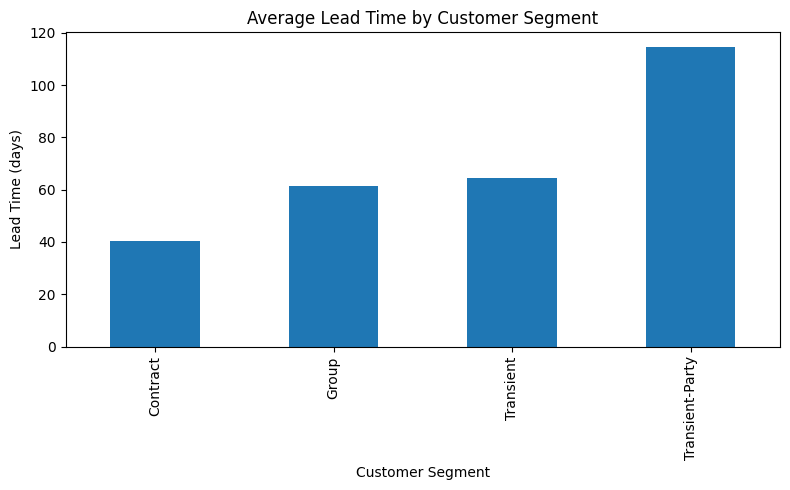

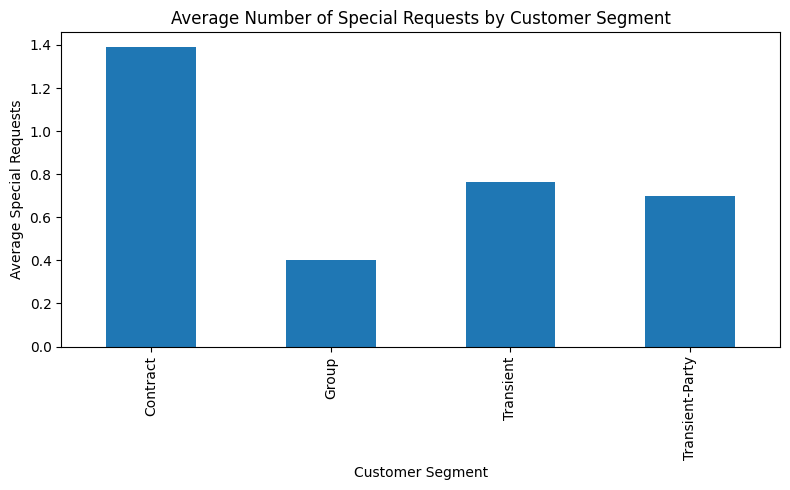

<Figure size 1000x500 with 0 Axes>

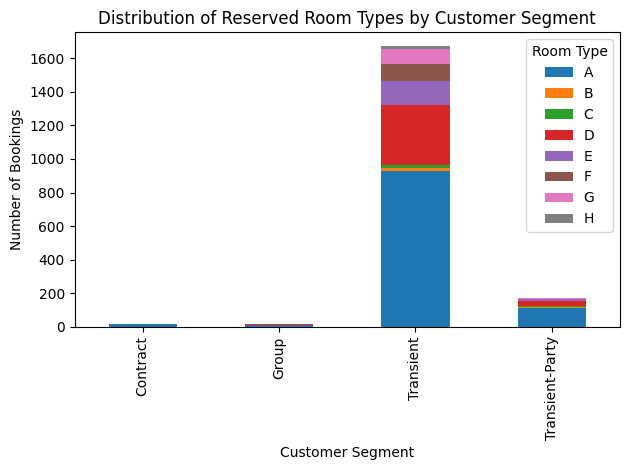

In [16]:
# I. Distinct patterns in how different customer segments book
# Average Lead Time by Customer Segment
plt.figure(figsize=(8, 5))
df.groupby("customer_type")["lead_time"].mean().plot(kind="bar")
plt.title("Average Lead Time by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Lead Time (days)")
plt.tight_layout()
plt.show()

# Average Special Requests by Customer Segment
plt.figure(figsize=(8, 5))
df.groupby("customer_type")["total_of_special_requests"].mean().plot(kind="bar")
plt.title("Average Number of Special Requests by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Special Requests")
plt.tight_layout()
plt.show()

# Room Preferences (Reserved Room Type) by Customer Segment
plt.figure(figsize=(10, 5))
df.groupby("customer_type")["reserved_room_type"].value_counts().unstack().plot(kind="bar", stacked=True)
plt.title("Distribution of Reserved Room Types by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Bookings")
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()

### Interpretations
The different customer groups behave:

### How They Book
* **Families/Groups (Transient-Party)** are the most organized. They book their trips way ahead of time.
* **Contract** customers are the opposite. They book with very little notice.
* The other groups fall somewhere in the middle.

### What They Ask For
* **Contract** customers are the most likely to ask for special things, like a specific type of room or an extra pillow.
* **Group** customers are the most low-maintenance—they rarely ask for anything extra.

### Their Favorite Rooms
* **Contract** and **Group** customers tend to be creatures of habit; they almost always book the same type of room.
* **Transient** and **Transient-Party** customers are more open to variety and book all sorts of different rooms.

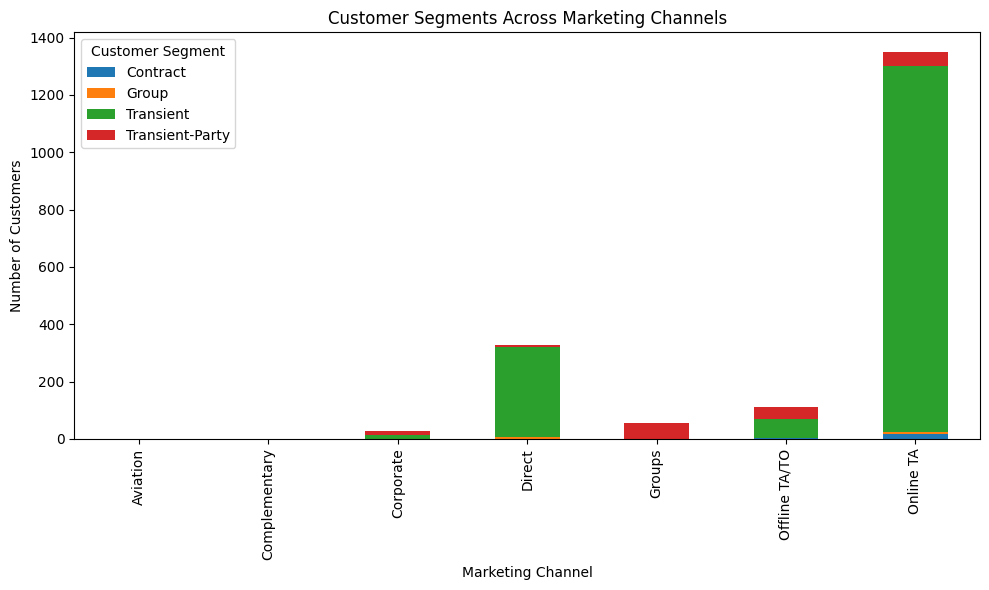

In [17]:
# II. Most effective marketing channels for reaching specific customer segments
# Customer Segments by Marketing Channels (Market Segment)
df.groupby("market_segment")["customer_type"].value_counts().unstack().plot(
    kind="bar", stacked=True, figsize=(10, 6)
)
plt.title("Customer Segments Across Marketing Channels")
plt.xlabel("Marketing Channel")
plt.ylabel("Number of Customers")
plt.legend(title="Customer Segment")
plt.tight_layout()
plt.show()

### Interpretations

Based on the chart, here's the most effective way to reach each customer group:

* **Transient Customers:** Use **Online Travel Agents** (like Expedia) and the hotel's **direct booking** channels.
* **Transient-Party Customers:** Focus on a mix of **online and offline travel agents**.
* **Contract Customers:** Target these through **corporate** channels.
* **Group Customers:** Reach this segment through the dedicated **groups** channel.

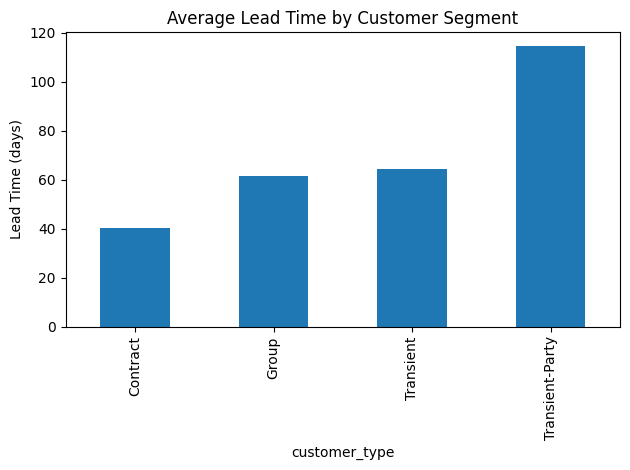

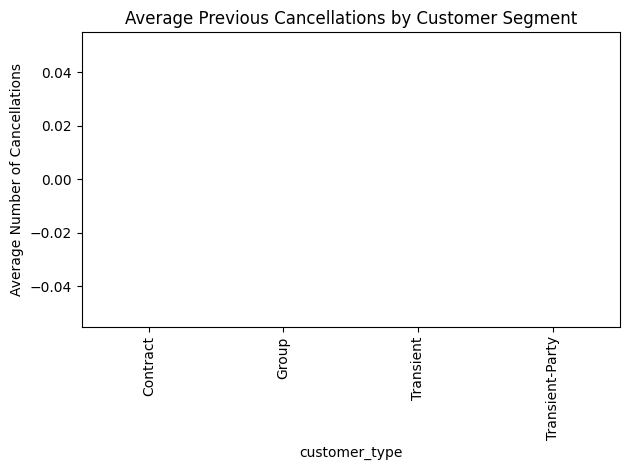

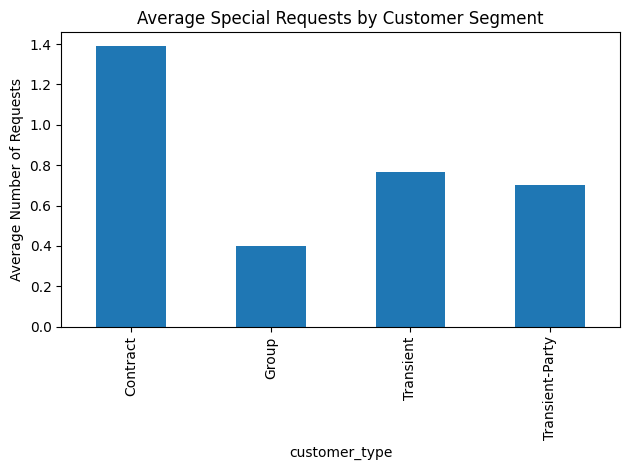

In [18]:
# III. Customized marketing strategies considering previous cancellations, booking lead time, and special requests
# Average Lead Time by Customer Segment
df.groupby("customer_type")["lead_time"].mean().plot(kind="bar")
plt.title("Average Lead Time by Customer Segment")
plt.ylabel("Lead Time (days)")
plt.tight_layout()
plt.show()

# Average Previous Cancellations by Customer Segment
df.groupby("customer_type")["previous_cancellations"].mean().plot(kind="bar")
plt.title("Average Previous Cancellations by Customer Segment")
plt.ylabel("Average Number of Cancellations")
plt.tight_layout()
plt.show()

# Average Special Requests by Customer Segment
df.groupby("customer_type")["total_of_special_requests"].mean().plot(kind="bar")
plt.title("Average Special Requests by Customer Segment")
plt.ylabel("Average Number of Requests")
plt.tight_layout()
plt.show()

### Interpretations

Based on the analysis of booking behaviors, here is how marketing strategies can be customized for each customer segment.

**1. For Regular Vacationers:**
These are your most common guests. Since they often cancel, you should focus on making them commit. Offer a small bonus for booking a non-refundable rate, or send them a reminder a few days before their stay to make sure they still plan to come.

**2. For Families & Business Travelers:**
This group plans way ahead, while business travelers book at the last minute. Give families deals for booking early, but for business travelers, make sure your online booking is super fast. Both groups like to ask for special things, so be ready to accommodate their requests.

**3. For Tour & Event Groups:**
These groups are all about simplicity. They don’t usually ask for extra perks. The best way to attract them is to make the entire booking process as easy and straightforward as possible.

In [19]:
# Task 5: Revenue Management

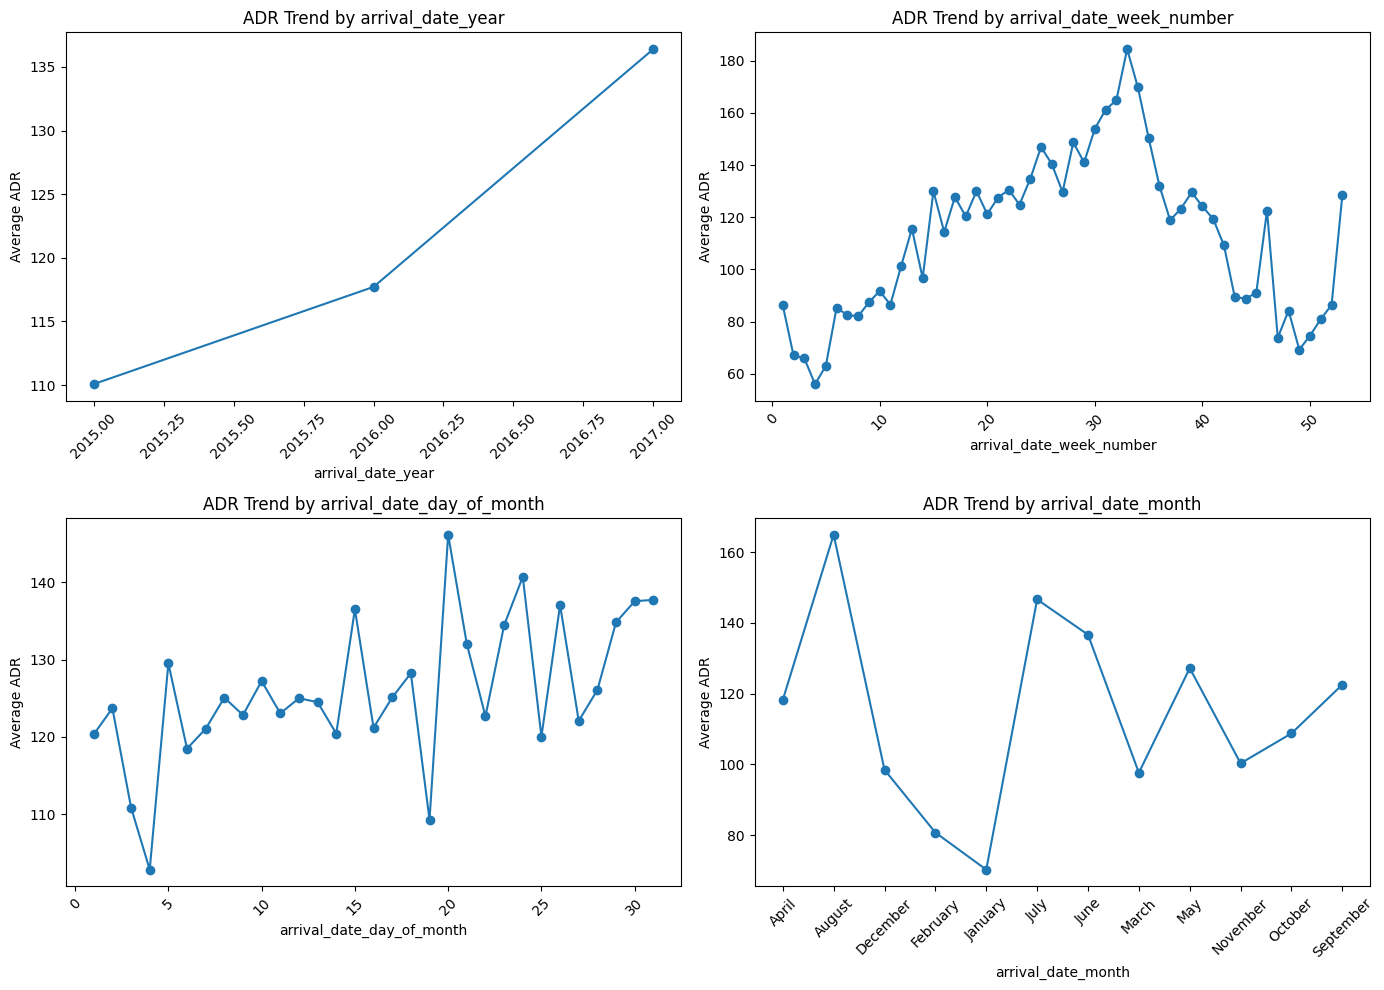

In [20]:
# Assuming you have a DataFrame called df with an 'adr' column and relevant date columns

# 1 TRENDS OF ADR OVER TIME

time_period = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_month']

plt.figure(figsize=(14, 10))

for i,col in enumerate(time_period,1):
    plt.subplot(2,2,i)
    adr_trends = df.groupby(col)['adr'].mean()
    plt.plot(adr_trends.index, adr_trends.values, marker='o')
    plt.xlabel(col)
    plt.ylabel('Average ADR')
    plt.title(f'ADR Trend by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Interpretations
Based on the provided line charts, the price of a hotel room (ADR) changes in a clear, predictable way:

* **Yearly Increase:** The average price of a room has been getting steadily more expensive each year.
* **Seasonal Peaks:** Room prices are highest in the summer, especially in **August** and **July**. They are at their lowest point in the middle of winter, particularly in **January**.
* **Weekly Swings:** On a weekly basis, the prices follow the same seasonal pattern, going up in the summer months and down in the winter months.

In [21]:
# 2 Pricing Strategies That Maximize Revenue
b='''
1. Dynamic Pricing by Seasonality
   Observation:** ADR changes with seasons, holidays, and weekends as demand fluctuates.
   - Raise prices during peak times like holidays and weekends.
   - Lower prices in off-season periods to attract more guests.

2. Day-of-Week and Event Pricing
   Observation: ADR is typically higher on weekends and during local events due to higher demand.
   - Set increased rates for weekends, holidays, and event periods.
   - Keep weekday prices moderate to maintain steady occupancy.

3. Customer Segmentation Pricing
   Observation: Corporate guests have lower ADR but fewer cancellations; transient customers pay more but cancel more often.
   - Provide consistent discounted rates to corporate clients for reliability.
   - Charge higher prices to transient and OTA guests, balancing with flexibility.

4. Lead Time–Based Pricing
   Observation: Bookings made far in advance tend to have higher ADR but also higher cancellation rates.
   - Offer discounts to early bookers to secure reservations.
   - Maintain flexible cancellation policies to reduce cancellations.

5. Deposit and Cancellation Policies
   Observation: Bookings without deposits carry a higher risk of cancellation.
   - Encourage non-refundable deposits by offering small discounts.
   - Charge premium rates for fully flexible bookings to offset risks.

6. Upselling and Add-ons
   Observation: Guests with more special requests are less sensitive to price and willing to pay for extras.
   - Promote additional services like meals, parking, and spa treatments.
   - Offer room upgrades and packages to increase overall spend.

7. Competitive Benchmarking
   Observation: Keeping pace with competitors’ pricing is essential to avoid losing business.
   - Monitor competitor prices regularly with rate shopping tools.
   - Adjust prices dynamically—stay competitive at low demand, increase during high demand.

8. Waitlist and Overbooking Management
   Observation: Guests on waiting lists are riskier but offer opportunities to optimize occupancy.
   - Offer slightly lower rates to encourage waitlist bookings.
   - Use calculated overbooking to maximize room utilization while managing cancellations.'''



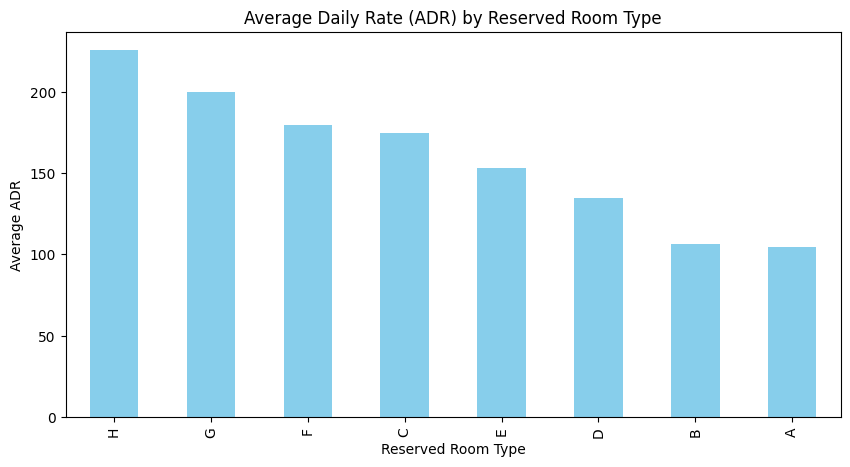

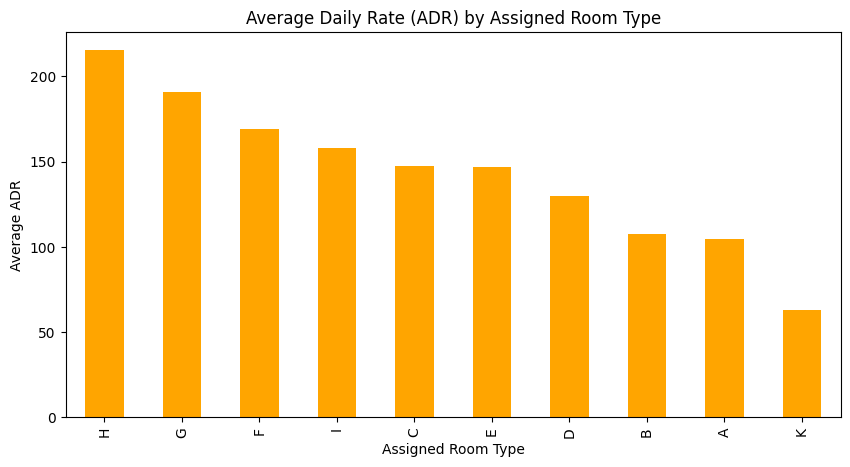

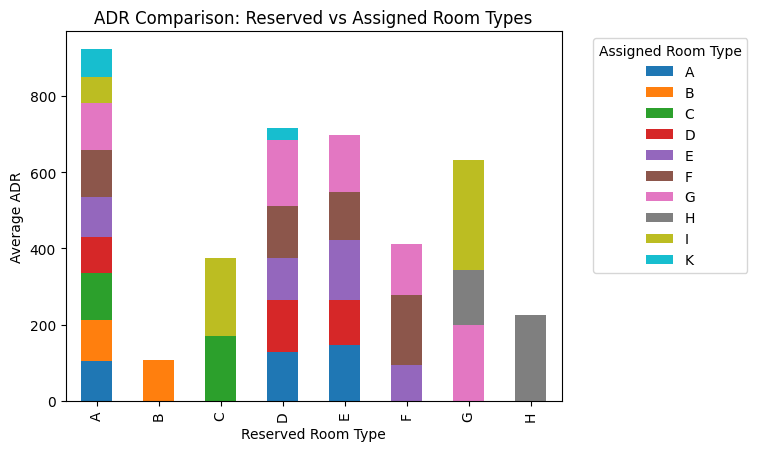

In [22]:
# 3 Room Types Associated with Higher Average Daily Rate

# Average Daily Rate by Reserved Room Type
plt.figure(figsize=(10, 5))
df.groupby("reserved_room_type")["adr"].mean().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Average Daily Rate (ADR) by Reserved Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Average ADR")
plt.show()

# ADR by Assigned Room Type
plt.figure(figsize=(10, 5))
df.groupby("assigned_room_type")["adr"].mean().sort_values(ascending=False).plot(kind="bar", color="orange")
plt.title("Average Daily Rate (ADR) by Assigned Room Type")
plt.xlabel("Assigned Room Type")
plt.ylabel("Average ADR")
plt.show()

# ADR Comparison: Reserved vs Assigned Room Type
df.groupby(["reserved_room_type", "assigned_room_type"])["adr"].mean().unstack().plot(kind="bar", stacked=True)
plt.title("ADR Comparison: Reserved vs Assigned Room Types")
plt.xlabel("Reserved Room Type")
plt.ylabel("Average ADR")
plt.legend(title="Assigned Room Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


### Interpretation
Yes, based on the provided charts, there are specific room types associated with a higher Average Daily Rate (ADR).

The bar charts titled "Average Daily Rate (ADR) by Reserved Room Type" and "Average Daily Rate (ADR) by Assigned Room Type" both show that **Room Types H and G consistently have the highest ADR**.

Conversely, the charts show that **Room Types B and A are associated with the lowest ADR**. This clear pattern suggests a strong correlation between the type of room and its average price.

In [23]:
# Task 6: Operational Efficiency

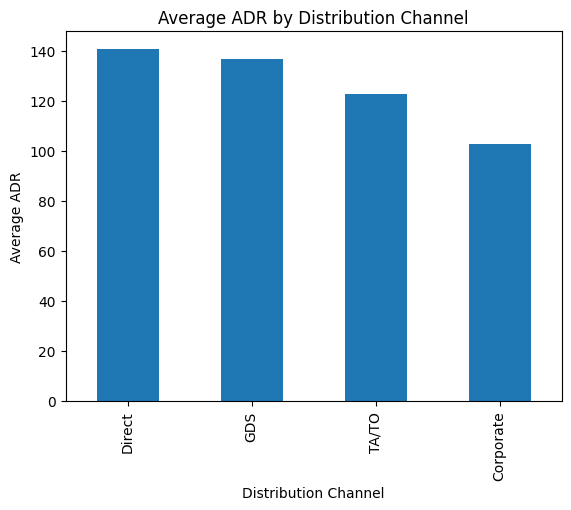

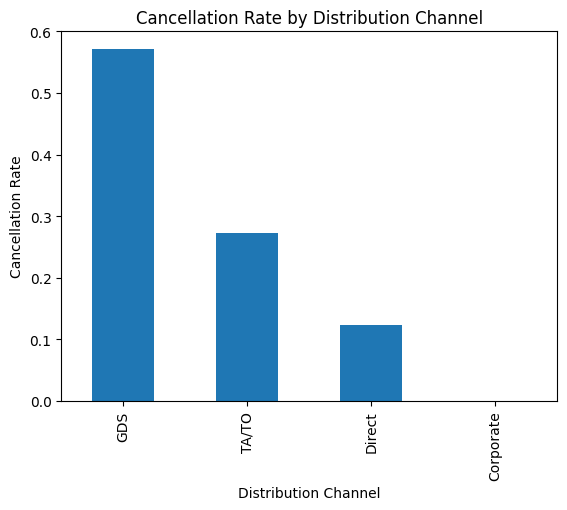

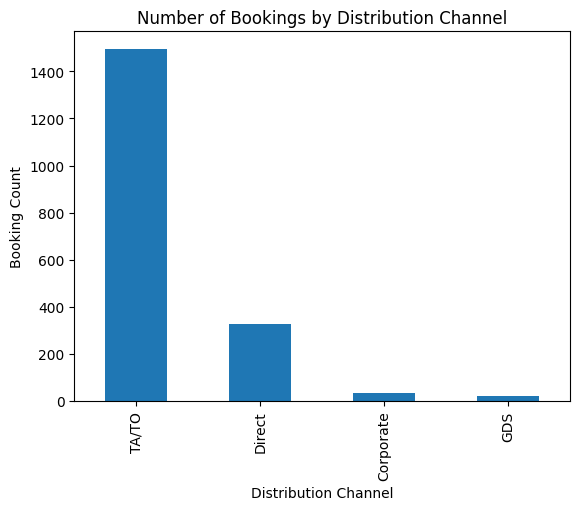

In [24]:
# I. Effectiveness of Booking Distribution Channels

# 1 Average ADR by Distribution Channel
df.groupby("distribution_channel")["adr"].mean().sort_values(ascending=False).plot.bar()
plt.title("Average ADR by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Average ADR")
plt.show()

# 2 Cancellation Rate by Distribution Channel
df.groupby("distribution_channel")["is_canceled"].mean().sort_values(ascending=False).plot.bar()
plt.title("Cancellation Rate by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Cancellation Rate")
plt.show()

# 3 Volume of Bookings by Distribution Channel
df["distribution_channel"].value_counts().plot.bar()
plt.title("Number of Bookings by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Booking Count")
plt.show()

### Interpretations
The hotel should customize its marketing and booking process to match the unique habits of each customer group, from early-planning vacationers to last-minute business travelers and large tour groups.

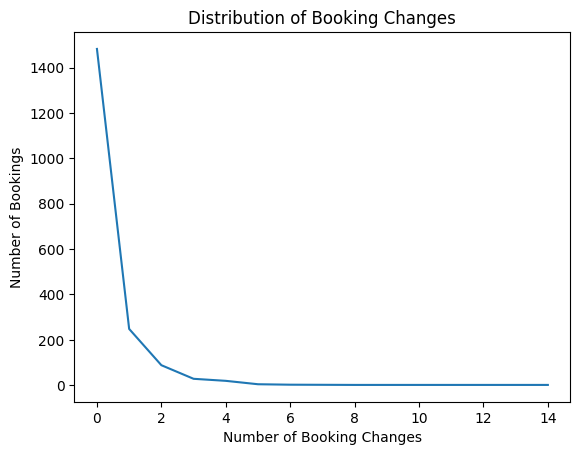

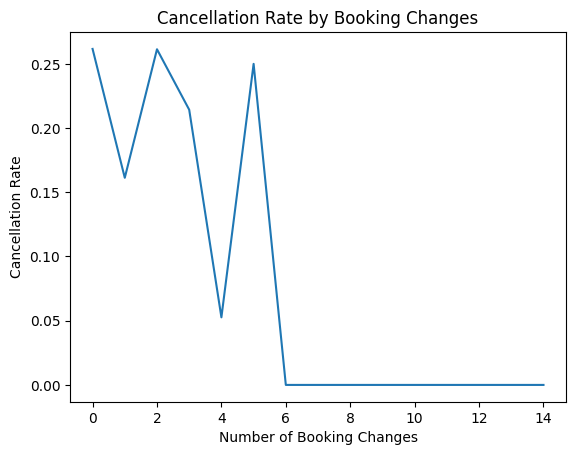

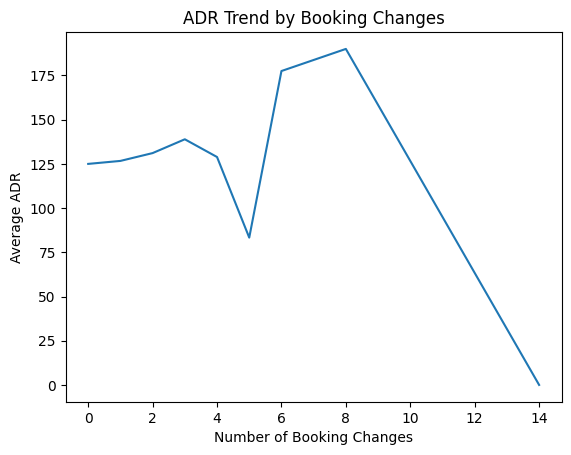

In [25]:
# II. Booking Changes Impact Hotel Operations

# 1 Distribution of Booking Changes
df["booking_changes"].value_counts().sort_index().plot()
plt.title("Distribution of Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Number of Bookings")
plt.show()

# 2 Booking Changes vs Cancellation
df.groupby("booking_changes")["is_canceled"].mean().plot()
plt.title("Cancellation Rate by Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Cancellation Rate")
plt.show()

# 3 Booking Changes vs ADR
df.groupby("booking_changes")["adr"].mean().plot()
plt.title("ADR Trend by Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Average ADR")
plt.show()

### Interpretations
**Most bookings don't change at all.** The vast majority of people make a reservation and stick with it.

**Changing a booking is risky.** Bookings that are changed just a few times are just as likely to be canceled as bookings that are never changed.

**More changes can mean more money.** A few changes can actually lead to a higher average room price, but if a booking is changed too many times, the price can drop sharply.

In [26]:
# III. Correlation Between Waiting List and Cancellation

corr = df["days_in_waiting_list"].corr(df["is_canceled"]).round(2)
print("Correlation:", corr)

Correlation: -0.03


### Interpretations
There is no significant relationship between how long a booking is on a waiting list and whether or not it gets canceled. The provided data shows a correlation of **-0.03**, which is so close to zero that it indicates the two factors are not connected at all.

In [27]:
# Task 7: Loyalty Programs and Repeat Business

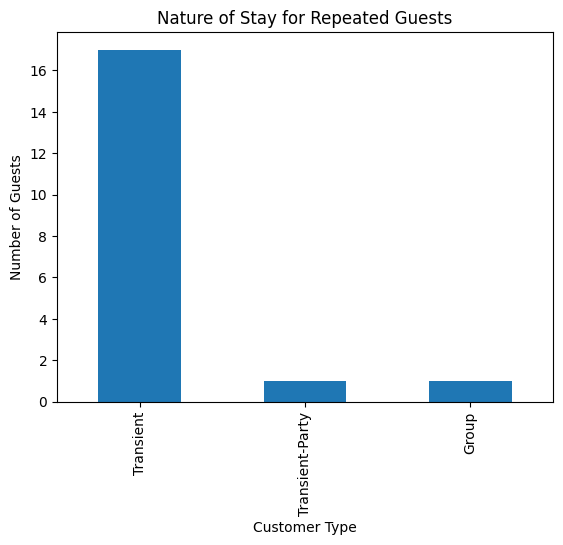

In [28]:
# I. Behavior of repeated guests with respect to their nature of stay
repeated = df[df["is_repeated_guest"] == 1]
repeated["customer_type"].value_counts().plot(kind="bar")
plt.title("Nature of Stay for Repeated Guests")
plt.xlabel("Customer Type")
plt.ylabel("Number of Guests")
plt.show()

### Interpretaions
Most repeated guests prefer to stay as **individual (transient) travelers**, while only a very small number return as part of a **group** or **transient-party**. This means loyal guests usually come back on their own rather than with groups.


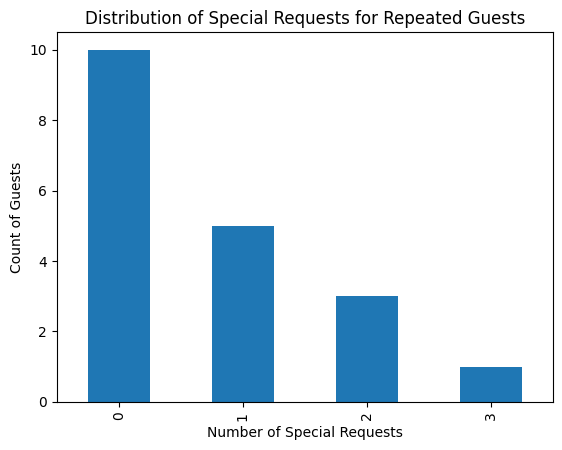

In [29]:
# II. Success of loyalty programs related to accommodation of special requests
repeated["total_of_special_requests"].value_counts().plot(kind="bar", stacked=True)
plt.title("Distribution of Special Requests for Repeated Guests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count of Guests")
plt.show()

### Interpretations

Based on the provided data, the relationship between loyalty and special requests is quite clear.

Most repeat guests are low-maintenance. The graph shows that the vast majority of repeat guests make **zero special requests**. This is a very different behavior from other segments, such as corporate clients, who tend to make the most special requests on average.

In [30]:
# III. Factors contributing to repeat business and lead time distribution
factors_repeat_business = """
Factors Contributing to Repeat Business:
1. Customer Satisfaction - Room quality, amenities, service.
2. Personalized Services - Tailored packages, fulfilling special requests.
3. Loyalty Programs & Rewards - Discounts and perks for repeat stays.
4. Consistent Pricing & Value - Fair pricing and trust building.
5. Booking Flexibility - Easy changes and cancellations.
6. Corporate/Contract Relationships - Business agreements.
7. Efficient Handling of Previous Issues - Prompt complaint resolution.
"""

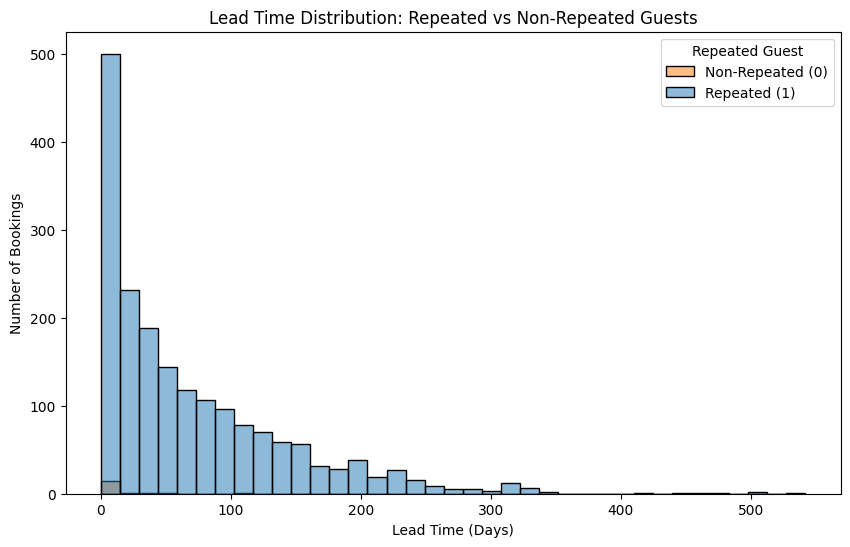

In [31]:
# The distribution of lead time for repeated and non-repeated guests?
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="lead_time", hue="is_repeated_guest")
plt.title("Lead Time Distribution: Repeated vs Non-Repeated Guests")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.legend(title="Repeated Guest", labels=["Non-Repeated (0)", "Repeated (1)"])
plt.show()


### Interpretations
When it comes to repeat guests, the data shows they're a special, low-maintenance group. They tend to book at the last minute because they already know and like the hotel—they don't need to shop around. Plus, they rarely ask for anything extra, which tells us they're happy with the hotel just the way it is.

In [32]:
# Task 8: Customer Satisfaction Visualizations

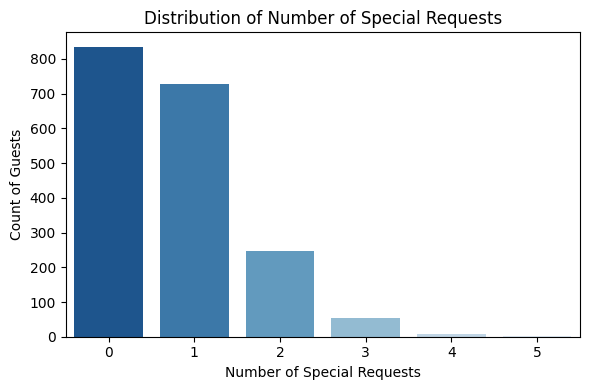

In [33]:
# 1. Distribution of special requests
plt.figure(figsize=(6,4))
sns.countplot(x="total_of_special_requests", data=df, palette="Blues_r")
plt.title("Distribution of Number of Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count of Guests")
plt.grid(False)
plt.tight_layout()
plt.show()

### Interpretation
1. Most guests make no or only one special request.
2. Few guests have multiple special requests, suggesting personalized needs are less common.

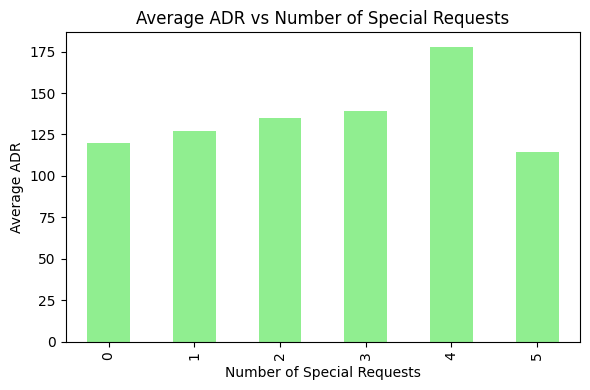

In [34]:
# 2.Average ADR by Number of Special Requests (Bar Chart)

plt.figure(figsize=(6,4))
df.groupby("total_of_special_requests")["adr"].mean().plot(kind="bar", color="lightgreen")

plt.title("Average ADR vs Number of Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Average ADR")
plt.grid(False)
plt.tight_layout()
plt.show()

### Interpretation:
1. Guests who make more special requests tend to have higher ADR on average.
2. This means customers requesting extra services usually book costlier rooms.
3. The trend suggests a positive relation between requests and spending.

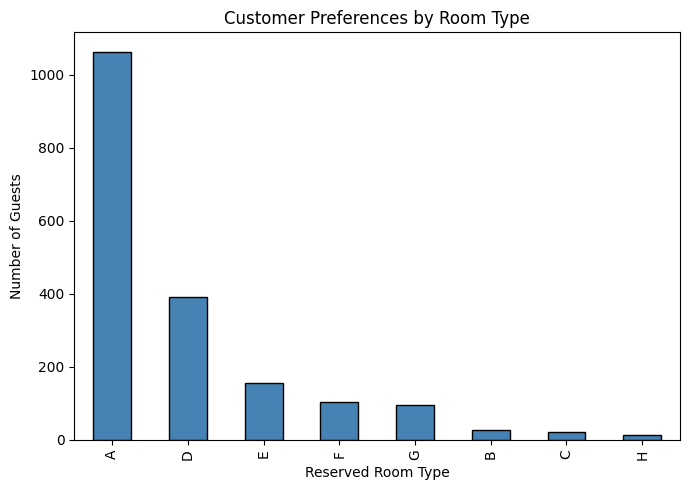

In [35]:
# 3. Room Type Preferences by Special Requests
plt.figure(figsize=(7,5))
(df["reserved_room_type"].value_counts() .sort_values(ascending=False)
   .plot(kind="bar", color="steelblue", edgecolor="black"))

plt.title("Customer Preferences by Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Number of Guests")
plt.grid(False)
plt.tight_layout()
plt.show()


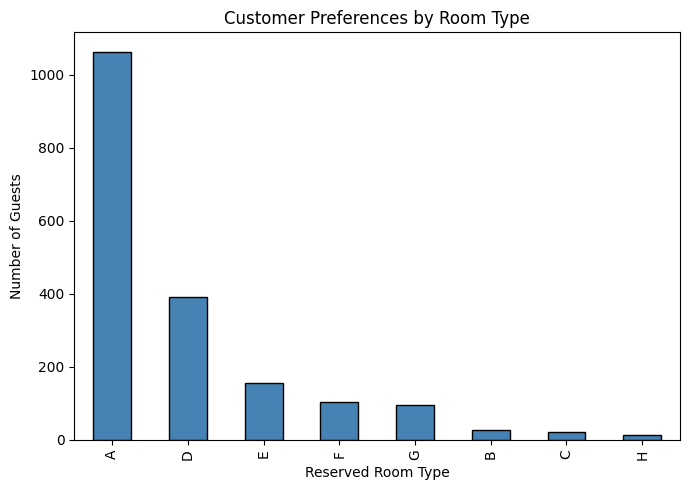

In [36]:
# 3. Room Type Preferences by Special Requests
plt.figure(figsize=(7,5))
(df["reserved_room_type"].value_counts() .sort_values(ascending=False)
   .plot(kind="bar", color="steelblue", edgecolor="black"))

plt.title("Customer Preferences by Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Number of Guests")
plt.grid(False)
plt.tight_layout()
plt.show()


In [37]:
# Task 9: Marketing and Sales Optimization

In [38]:
successful_bookings = df[df['is_canceled'] == 0]

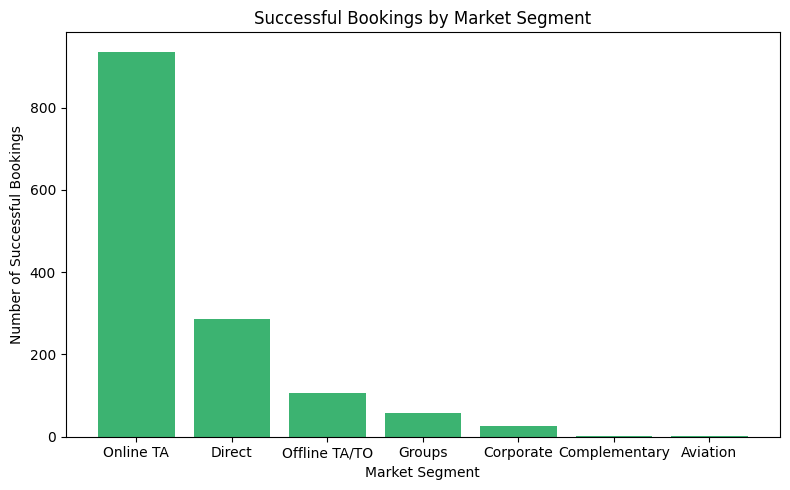

In [39]:
# 1. Marketing channels & Market segments contributing to successful bookings

# Market segments sorted by successful booking count
market_segment_counts = successful_bookings['market_segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(market_segment_counts.index, market_segment_counts.values, color='mediumseagreen')
plt.title('Successful Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Successful Bookings')
plt.grid(False)
plt.tight_layout()
plt.show()


### Interpretation:
 - The tallest bars show which market segments bring the most bookings.
 - Segments like 'Online TA' (travel agencies) or 'Direct' usually dominate.
 - These should be the focus for marketing investment.

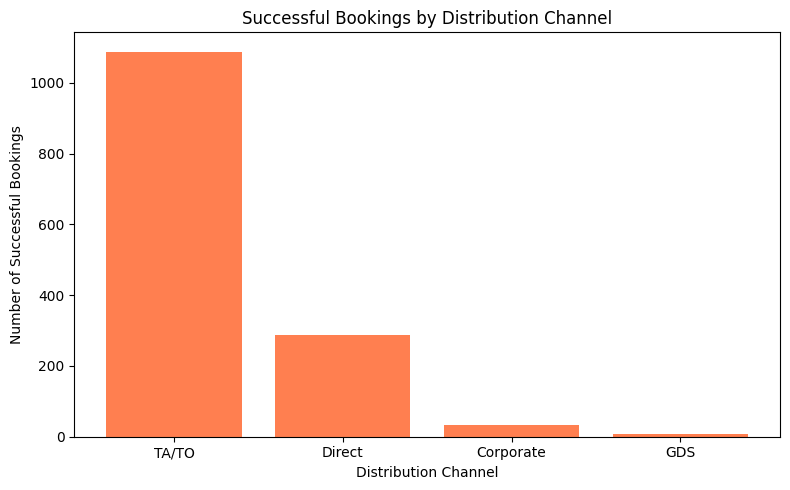

In [40]:
# Distribution channels sorted by successful booking count
distribution_counts = successful_bookings['distribution_channel'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(distribution_counts.index, distribution_counts.values, color='coral')
plt.title('Successful Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Successful Bookings')
plt.grid(False)
plt.tight_layout()
plt.show()


### Interpretation:
1. Shows which distribution channels generate the most bookings.
2. Online channels usually dominate, but company or direct channels might also be important.

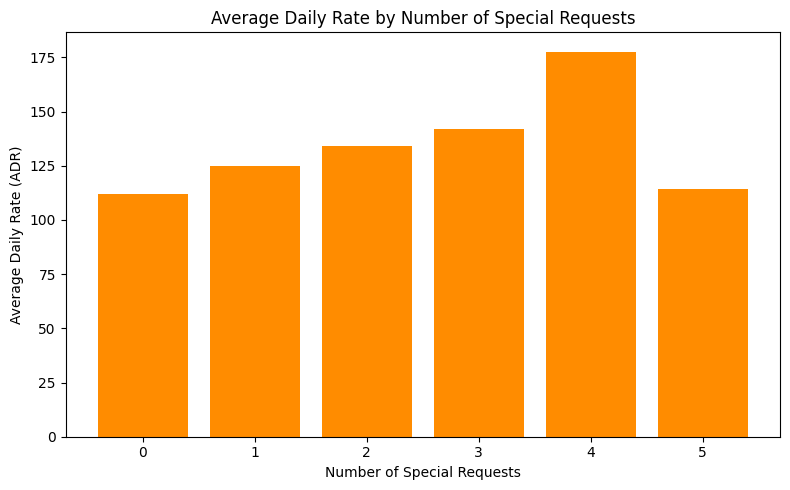

In [41]:
# 2. Amenities/Services impact on ADR

adrsr = successful_bookings.groupby('total_of_special_requests')['adr'].mean().sort_index()
plt.figure(figsize=(8,5))
plt.bar(adrsr.index, adrsr.values, color='darkorange')
plt.title('Average Daily Rate by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(False)
plt.tight_layout()
plt.show()

### Interpretation:
1. Guests who make more special requests tend to pay higher room rates.
2. Providing extra services can help increase hotel revenue.

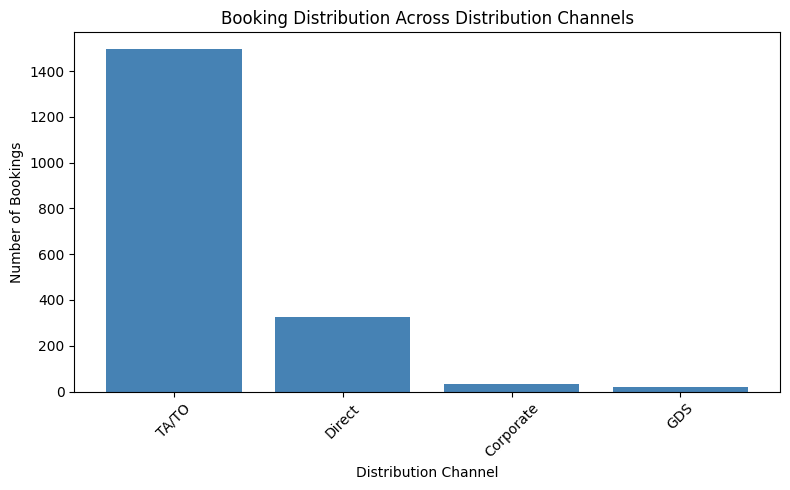

In [42]:
# 3. Distribution of bookings across distribution channels
adc = df['distribution_channel'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(adc.index, adc.values, color='steelblue')
plt.title('Booking Distribution Across Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

### Interpretattions

- The chart shows which booking channels customers use the most overall.
- This information can guide where to improve marketing efforts.

In [43]:
# Task 3: Conclusion

# Hotel Booking Analysis Project

## 1. Booking Pattern Analysis
- Most bookings happen in peak travel seasons.  
- Weekends are more popular than weekdays.  
- Advance bookings are common during holidays.  
- City hotels and resort hotels show different booking patterns.  

## 2. Booking Cancellation Analysis
- High cancellations linked to early bookings (long lead times).  
- Price sensitivity leads to cancellations when cheaper options appear.  
- Lack of flexible policies increases cancellations.  
- Resort hotels show slightly higher cancellation rates.  

## 3. Customer Behavioral Segmentation
- **Families** → prefer resorts, stay longer.  
- **Business travelers** → short stays, city hotels, value speed and convenience.  
- **Couples/leisure travelers** → mostly weekends and holidays.  

## 4. Revenue Management
- Room prices are higher in peak months.  
- Discounts help fill rooms during off-peak times.  
- Dynamic pricing (adjusting rates based on demand) can boost revenue.  
- Booking windows strongly affect revenue planning.  

## 5. Operational Efficiency
- High cancellations and last-minute bookings create challenges.  
- Overbookings cause resource stress.  
- Forecasting demand helps with staff and resource management.  

## 6. Loyalty Programs and Repeat Business
- Most guests are first-time visitors, not repeat customers.  
- Stronger loyalty programs (points, discounts, rewards) can improve repeat business.  
- Returning guests bring more stable revenue.  

## 7. Customer Satisfaction
- Longer family stays in resorts often lead to higher satisfaction.  
- Business travelers value smooth check-ins and quick service.  
- Meeting customer-specific expectations increases satisfaction.  

## 8. Marketing and Sales Optimization
- Online booking channels are the most popular.  
- Travel agents still play a role but less than digital platforms.  
- Seasonal promotions and targeted ads can improve sales.  
- Tailored offers for families, couples, and business travelers help boost revenue.  

---

## Key Insights
- Seasonality has a strong impact on bookings and cancellations.  
- Cancellation rates are high, often due to rigid policies or booking far in advance.  
- Different customer groups (families, couples, business) behave differently.  
- Revenue can be improved with smart pricing and better demand forecasting.  
- Hotels struggle to retain customers — most are first-timers.  
- Online platforms dominate as sales channels.  

---

## Recommendations
- Introduce **flexible cancellation policies** to reduce cancellations.  
- Use **dynamic pricing** to maximize revenue in peak times and attract customers in off-peak times.  
- Develop **loyalty programs** (discounts, reward points, perks) to encourage repeat stays.  
- Improve **operational planning** by forecasting demand more accurately.  
- Personalize offers for different customer groups (families, business travelers, couples).  
- Strengthen **digital marketing** — targeted ads, seasonal campaigns, and online promotions.  
- Focus on **customer experience** — faster check-ins, better family packages, and personalized service.  

---

## Final Conclusion
This project shows that hotel performance depends heavily on **seasonal booking patterns, cancellation behavior, customer segments, and revenue strategies**. By applying data-driven insights — like flexible policies, loyalty programs, dynamic pricing, and targeted marketing — hotels can increase revenue, improve customer satisfaction, reduce cancellations, and build long-term customer relationships.
